In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Get_file import Get_file   # return dirpath, dirnames, filenames
from FFT import FFT, PlotDataOnTimeDomain
from BandPassFilter import BandPassFilter, PlotDataOnFreqDomain, BandPassListFilter
from Danny_ML_CLF import Danny_ML_CLF
import os

%matplotlib inline

data_dir = "C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\database\\New_SDK_Data"


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def CalculateZeros(NumpyArray):
    LogicWithZeros = (NumpyArray == 0)
    return np.sum(LogicWithZeros)

In [3]:
os.chdir(data_dir)
_,data_files,_ = Get_file(data_dir)
data_files
all_df = pd.DataFrame()
for file in data_files:
    emotion = 0
    # 1->normal, 2->happy, 3->scare, 4->touch, 
    _,_,file_names = Get_file(data_dir + '\\' + file)
    for fn in file_names:
        
        data_name = data_dir + '\\' + file + '\\' + fn
        if 'happy' in fn:
            emotion = 2
        elif 'scare' in fn:
            emotion = 3
        elif 'touch' in fn:
            emotion = 4
        else:
            print(fn)
            emotion = 1
        #print(emotion, fn)
        df = pd.read_csv(data_name, engine='python')
        df_length = df.shape[0]
        
        df['label'] = df['label']*emotion
            
        try:
            all_df = pd.concat([all_df,df])
        except Exception as e:
            print(e)
            all_df = df
        #print(sorted(df.corr()['label'].tolist()), fn)
        #print('***********************************************')
        

In [4]:
# 移除遺失值
all_df = all_df.dropna(axis=1)
all_df = all_df.reset_index()

In [5]:
Columns = ['alpha', 'channel', 'gamma', 'heig_beta', 'label','low_beta','theta','time']
Features = ['alpha', 'heig_beta', 'low_beta','theta']
Labels = ['label']

In [6]:
channel1 = all_df[all_df['channel'] == 1].index
channel2 = all_df[all_df['channel'] == 2].index
channel3 = all_df[all_df['channel'] == 3].index
channel4 = all_df[all_df['channel'] == 4].index
channel5 = all_df[all_df['channel'] == 5].index
channel6 = all_df[all_df['channel'] == 6].index
channel7 = all_df[all_df['channel'] == 7].index
channel8 = all_df[all_df['channel'] == 8].index
channel9 = all_df[all_df['channel'] == 9].index
channel10 = all_df[all_df['channel'] == 10].index
channel11 = all_df[all_df['channel'] == 11].index
channel12 = all_df[all_df['channel'] == 12].index
channel13 = all_df[all_df['channel'] == 13].index
channel14 = all_df[all_df['channel'] == 14].index

df_1 = all_df.iloc[channel1]
df_2 = all_df.iloc[channel2]
df_3 = all_df.iloc[channel3]
df_4 = all_df.iloc[channel4]
df_5 = all_df.iloc[channel5]
df_6 = all_df.iloc[channel6]
df_7 = all_df.iloc[channel7]
df_8 = all_df.iloc[channel8]
df_9 = all_df.iloc[channel9]
df_10 = all_df.iloc[channel10]
df_11 = all_df.iloc[channel11]
df_12 = all_df.iloc[channel12]
df_13 = all_df.iloc[channel13]
df_14 = all_df.iloc[channel14]


In [7]:
my_df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9,
        df_10, df_11, df_12, df_13, df_14]

In [8]:
os.chdir('C:\\Users\\zxpay\\Desktop\\BME_Senior\\EEG_CLF\\Emotion\\Code')
for n in range(len(my_df)):
    Testing_df = my_df[n]
    data = np.zeros([Testing_df.shape[0], 4])
    for i in range(4):
        data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
    label = np.array(Testing_df['label'], dtype=np.float32)
    if CalculateZeros(data) != 0:
        print('Warning !!!')

    pos = np.where((label==0) | (label==2))
    
    zero_pos = np.where(label==0)
    zero_choose = np.random.randint(500,20000,size=400)
    zero_choose = zero_pos[0][zero_choose]
    data_normal = data[zero_choose]
    label_normal = label[zero_choose]
    
    pos_happy = np.where(label==2)
    one_choose = np.random.randint(20,1020,size=400)
    one_choose = pos_happy[0][one_choose]
    data_happy = data[one_choose]
    label_happy = label[one_choose]

    data_del = np.delete(data, pos, axis=0)
    label_del = np.delete(label, pos)

    data_all = np.vstack((data_normal, data_del))
    label_all = np.hstack((label_normal, label_del))
    data_all = np.vstack((data_happy, data_all))
    label_all = np.hstack((label_happy, label_all))

#     print(data_all.shape)
#     print(label_all.shape)


    clf = Danny_ML_CLF()
    train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_all, test_size=0.3, Standard=True)
    clf.Fit_value(train_X, train_y)
    clf.Train()
    clf.Report(train_X, train_y, [0,2,3,4], show_cm=False)
    clf.Report2txt('Train' + str(n+1) + '.txt')
    print(clf.Score())
    print()
    clf.Report(test_X, test_y, [0,2,3,4], show_cm=False)
    clf.Report2txt('Test' + str(n+1) + '.txt')
    print(clf.Score())
    print('Report Okay !\n\n')

(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4827264239028945
Tree Score :  0.5452847805788982
Bayes Score :  0.35947712418300654
KNN Score :  1.0
XGB Score :  0.715219421101774
Stacking Score :  0.9561157796451915
Voting Score :  0.9495798319327731
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5256769374416433
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

SVM Score :  0.46956521739130436
Tree Score :  0.46304347826086956
Bayes Score :  0.3717391304347826
KNN Score :  0.45652173913043476
XGB Score :  0.5021739130434782
Stacking Score :  0.44130434782608696
Voting Score :  0.4934782608695652
Bagging Score :  0.5260869565217391
RF Score :  0.5173913043478261
Adaboost Score :  0.45
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4911297852474323
Tree Score :  0.5592903828197946
Bayes Score :  0.4239028944911298
KNN Score :  1.0
XGB Score :  0.7086834733893558
Stacking Score :  0.8842203548085901
Voting Score :  0.945845004668534
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.49673202614379086
None

SVM Score :  0.44782608695652176
Tree Score :  0.4260869565217391
Bayes Score :  0.3739130434782609
KNN Score :  0.48478260869565215
XGB Score :  0.45
Stacking Score :  0.44565217391304346
Voting Score :  0.4891304347826087
Bagging Score :  0.508695652173913
RF Score :  0.5152173913043478
Adaboost Score :  0.42391304347826086
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4892623716153128
Tree Score :  0.5658263305322129
Bayes Score :  0.3622782446311858
KNN Score :  1.0
XGB Score :  0.7264239028944911
Stacking Score :  0.8664799253034547
Voting Score :  0.9402427637721755
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.49673202614379086
None

SVM Score :  0.46304347826086956
Tree Score :  0.48478260869565215
Bayes Score :  0.36086956521739133
KNN Score :  0.44565217391304346
XGB Score :  0.48695652173913045
Stacking Score :  0.42391304347826086
Voting Score :  0.46956521739130436
Bagging Score : 

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

 0.47608695652173916
RF Score :  0.4956521739130435
Adaboost Score :  0.44565217391304346
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.5107376283846872
Tree Score :  0.5714285714285714
Bayes Score :  0.3865546218487395
KNN Score :  1.0
XGB Score :  0.7105508870214753
Stacking Score :  0.903828197945845
Voting Score :  0.9243697478991597
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5275443510737629
None

SVM Score :  0.4717391304347826
Tree Score :  0.4782608695652174
Bayes Score :  0.3760869565217391
KNN Score :  0.44130434782608696
XGB Score :  0.5
Stacking Score :  0.41739130434782606
Voting Score :  0.5
Bagging Score :  0.5021739130434782
RF Score :  0.4826086956521739
Adaboost Score :  0.4543478260869565
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4957983193277311
Tree Score :  0.5536881419234361
Bayes Score :  0.3678804855275444
KNN Score :  1.0
XGB Score :  0.7142857142857143
Stacking Score :  0.9084967320261438
Voting Score :  0.9411764705882353
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5051353874883286
None

SVM Score :  0.49130434782608695
Tree Score :  0.46304347826086956
Bayes Score :  0.3869565217391304
KNN Score :  0.48478260869565215
XGB Score :  0.47391304347826085
Stacking Score :  0.4717391304347826
Voting Score :  0.5130434782608696
Bagging Score :  0.49782608695652175
RF Score :  0.5239130434782608
Adaboost Score :  0.4282608695652174
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4677871148459384
Tree Score :  0.5331465919701214
Bayes Score :  0.3818860877684407
KNN Score :  1.0
XGB Score :  0.7133520074696545
Stacking Score :  0.8814192343604108
Voting Score :  0.945845004668534
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.477124183006536
None

SVM Score :  0.48695652173913045
Tree Score :  0.47608695652173916
Bayes Score :  0.39565217391304347
KNN Score :  0.49130434782608695
XGB Score :  0.5282608695652173
Stacking Score :  0.4717391304347826
Voting Score :  0.5108695652173914
Bagging Score :  0.5065217391304347
RF Score :  0.5456521739130434
Adaboost Score :  0.45217391304347826
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.46591970121381887
Tree Score :  0.5676937441643324
Bayes Score :  0.40709617180205415
KNN Score :  1.0
XGB Score :  0.7245564892623716
Stacking Score :  0.9449112978524743
Voting Score :  0.9607843137254902
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.4752567693744164
None

SVM Score :  0.48043478260869565
Tree Score :  0.48478260869565215
Bayes Score :  0.4152173913043478
KNN Score :  0.4673913043478261
XGB Score :  0.4891304347826087
Stacking Score :  0.4608695652173913
Voting Score :  0.5
Bagging Score :  0.5
RF Score :  0.5
Adaboost Score :  0.4217391304347826
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4911297852474323
Tree Score :  0.5508870214752568
Bayes Score :  0.3968253968253968
KNN Score :  1.0
XGB Score :  0.7236227824463118
Stacking Score :  0.9084967320261438
Voting Score :  0.9019607843137255
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.4668534080298786
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.43043478260869567
Tree Score :  0.4652173913043478
Bayes Score :  0.358695652173913
KNN Score :  0.4717391304347826
XGB Score :  0.47391304347826085
Stacking Score :  0.45869565217391306
Voting Score :  0.4652173913043478
Bagging Score :  0.49782608695652175
RF Score :  0.4891304347826087
Adaboost Score :  0.43478260869565216
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.488328664799253
Tree Score :  0.5667600373482726
Bayes Score :  0.3912231559290383
KNN Score :  1.0
XGB Score :  0.7124183006535948
Stacking Score :  0.8291316526610645
Voting Score :  0.938375350140056
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5396825396825397
None

SVM Score :  0.4434782608695652
Tree Score :  0.4782608695652174
Bayes Score :  0.3630434782608696
KNN Score :  0.48043478260869565
XGB Score :  0.45869565217391306
Stacking Score :  0.45
Voting Score :  0.4956521739130435
Bagging Score :  0.4956521739130435
RF Score :  0.4956521739130435
Adaboost Score :  0.40869565217391307
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.48179271708683474
Tree Score :  0.5639589169000934
Bayes Score :  0.3772175536881419
KNN Score :  1.0
XGB Score :  0.7086834733893558
Stacking Score :  0.896358543417367
Voting Score :  0.9374416433239963
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5490196078431373
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

SVM Score :  0.4956521739130435
Tree Score :  0.5108695652173914
Bayes Score :  0.3804347826086957
KNN Score :  0.5
XGB Score :  0.5456521739130434
Stacking Score :  0.4891304347826087
Voting Score :  0.5391304347826087
Bagging Score :  0.5543478260869565
RF Score :  0.5543478260869565
Adaboost Score :  0.48695652173913045
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.4939309056956116
Tree Score :  0.5527544351073763
Bayes Score :  0.4024276377217554
KNN Score :  1.0
XGB Score :  0.704014939309057
Stacking Score :  0.8972922502334267
Voting Score :  0.9150326797385621
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5154061624649859
None



C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


SVM Score :  0.45652173913043476
Tree Score :  0.4891304347826087
Bayes Score :  0.36086956521739133
KNN Score :  0.4891304347826087
XGB Score :  0.5239130434782608
Stacking Score :  0.4608695652173913
Voting Score :  0.5152173913043478
Bagging Score :  0.5391304347826087
RF Score :  0.5260869565217391
Adaboost Score :  0.4369565217391304
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.46591970121381887
Tree Score :  0.5602240896358543
Bayes Score :  0.3753501400560224
KNN Score :  1.0
XGB Score :  0.7133520074696545
Stacking Score :  0.911297852474323
Voting Score :  0.945845004668534
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5210084033613446
None

SVM Score :  0.46956521739130436
Tree Score :  0.4717391304347826
Bayes Score :  0.3826086956521739
KNN Score :  0.4434782608695652
XGB Score :  0.48695652173913045
Stacking Score :  0.4260869565217391
Voting Score :  0.48695652173913045
Bagging Score :  0.4652173913043478
RF Score :  0.46956521739130436
Adaboost Score :  0.4826086956521739
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

SVM Score :  0.48552754435107376
Tree Score :  0.5546218487394958
Bayes Score :  0.37254901960784315
KNN Score :  1.0
XGB Score :  0.715219421101774
Stacking Score :  0.9234360410831
Voting Score :  0.9393090569561158
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5294117647058824
None

SVM Score : 

C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


 0.4434782608695652
Tree Score :  0.46956521739130436
Bayes Score :  0.3630434782608696
KNN Score :  0.47608695652173916
XGB Score :  0.4956521739130435
Stacking Score :  0.44782608695652176
Voting Score :  0.49782608695652175
Bagging Score :  0.49130434782608695
RF Score :  0.5043478260869565
Adaboost Score :  0.4434782608695652
None
Report Okay !


(1531, 4)
(1531,)


C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

SVM Score :  0.480859010270775
Tree Score :  0.5415499533146592
Bayes Score :  0.39775910364145656
KNN Score :  1.0
XGB Score :  0.7068160597572363
Stacking Score :  0.9337068160597572
Voting Score :  0.9393090569561158
Bagging Score :  1.0
RF Score :  1.0
Adaboost Score :  0.5322128851540616
None

SVM Score :  0.508695652173913
Tree Score :  0.4717391304347826
Bayes Score :  0.3760869565217391
KNN Score :  0.49782608695652175
XGB Score :  0.5108695652173914
Stacking Score :  0.48695652173913045
Voting Score :  0.5195652173913043
Bagging Score :  0.49782608695652175
RF Score :  0.5130434782608696
Adaboost Score :  0.4652173913043478
None
Report Okay !




C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\zxpay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [9]:
np.sum(clf.RF_prediction(test_X)==test_y)/test_y.shape[0]

0.5130434782608696

In [10]:
print(np.sum(label_all==0))
print(np.sum(label_all==2))
print(np.sum(label_all==3))
print(np.sum(label_all==4))

400
400
351
380


In [11]:
clf.RF_prediction(test_X)

array([4., 4., 3., 0., 3., 3., 2., 3., 2., 2., 2., 4., 3., 4., 3., 3., 2.,
       3., 4., 0., 3., 0., 4., 3., 0., 3., 3., 4., 4., 4., 3., 2., 2., 3.,
       2., 3., 3., 2., 3., 3., 0., 2., 2., 2., 2., 2., 2., 4., 3., 4., 0.,
       2., 3., 3., 4., 0., 4., 0., 4., 3., 4., 0., 4., 4., 4., 4., 0., 2.,
       3., 0., 2., 2., 4., 3., 4., 4., 4., 4., 3., 4., 0., 4., 2., 3., 0.,
       3., 2., 2., 0., 0., 4., 3., 2., 2., 3., 3., 3., 4., 4., 4., 4., 0.,
       0., 4., 4., 2., 0., 0., 0., 4., 0., 2., 3., 3., 2., 3., 4., 2., 4.,
       4., 3., 4., 2., 2., 3., 0., 4., 0., 0., 2., 3., 3., 3., 2., 3., 2.,
       2., 4., 3., 0., 2., 2., 0., 2., 2., 3., 0., 0., 4., 3., 2., 2., 3.,
       4., 3., 2., 2., 3., 4., 4., 2., 4., 3., 4., 4., 4., 3., 0., 2., 0.,
       4., 0., 2., 4., 4., 3., 0., 2., 3., 0., 2., 2., 3., 2., 3., 0., 0.,
       2., 0., 4., 4., 4., 4., 2., 4., 4., 0., 4., 4., 2., 2., 3., 0., 2.,
       2., 2., 4., 2., 2., 4., 4., 0., 2., 2., 0., 4., 0., 2., 4., 4., 3.,
       4., 4., 3., 3., 0.

In [12]:
from sklearn.tree import DecisionTreeClassifier
label_name = []
for x in train_y:
    if x == 0:
        label_name.append('normal')
    elif x == 2:
        label_name.append('happy')
    elif x == 3:
        label_name.append('scare')
    elif x == 4:
        label_name.append('touch')
    else:
        print(x)
label_name_test = []
for x in test_y:
    if x == 0:
        label_name_test.append('normal')
    elif x == 2:
        label_name_test.append('happy')
    elif x == 3:
        label_name_test.append('scare')
    elif x == 4:
        label_name_test.append('touch')
    else:
        print(x)
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(train_X, label_name)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['alpha', 'heig_beta', 'low_beta','theta'],\
                class_names=['normal','happy','scare', 'touch'])


In [14]:
!dot -Tpng tree.dot -o tree.png

In [15]:
tree.predict(test_X)

array(['scare', 'normal', 'scare', 'normal', 'scare', 'normal', 'happy',
       'scare', 'happy', 'happy', 'happy', 'touch', 'normal', 'scare',
       'scare', 'scare', 'happy', 'scare', 'touch', 'scare', 'scare',
       'normal', 'normal', 'scare', 'scare', 'touch', 'scare', 'normal',
       'touch', 'normal', 'normal', 'happy', 'happy', 'touch', 'scare',
       'scare', 'scare', 'happy', 'scare', 'scare', 'normal', 'happy',
       'happy', 'scare', 'happy', 'happy', 'happy', 'scare', 'touch',
       'touch', 'normal', 'happy', 'normal', 'normal', 'touch', 'touch',
       'touch', 'scare', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'touch', 'touch', 'touch', 'scare', 'touch', 'normal',
       'happy', 'happy', 'normal', 'normal', 'touch', 'scare', 'scare',
       'touch', 'normal', 'normal', 'normal', 'normal', 'happy', 'normal',
       'normal', 'normal', 'happy', 'happy', 'normal', 'normal', 'normal',
       'scare', 'happy', 'scare', 'normal', 'scare', 'norm

In [16]:
tree.score(test_X, label_name_test)

0.45

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])

In [109]:
Testing_df = my_df[4]
data = np.zeros([Testing_df.shape[0], 4])
for i in range(4):
    data[:, i] = np.array(Testing_df[Features[i]], dtype=np.float32)
label = np.array(Testing_df['label'], dtype=np.float32)
if CalculateZeros(data) != 0:
    print('Warning !!!')

pos = np.where((label==0) | (label==2))

zero_pos = np.where(label==0)
zero_choose = np.random.randint(500,20000,size=400)
zero_choose = zero_pos[0][zero_choose]
data_normal = data[zero_choose]
label_normal = label[zero_choose]

pos_happy = np.where(label==2)
one_choose = np.random.randint(20,1020,size=400)
one_choose = pos_happy[0][one_choose]
data_happy = data[one_choose]
label_happy = label[one_choose]

data_del = np.delete(data, pos, axis=0)
label_del = np.delete(label, pos)

data_all = np.vstack((data_normal, data_del))
label_all = np.hstack((label_normal, label_del))
data_all = np.vstack((data_happy, data_all))
label_all = np.hstack((label_happy, label_all))


from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
label_onehot = one.fit_transform(label_all.reshape(-1,1)).toarray()
train_X, test_X, train_y, test_y = clf.Split_data(data_all, label_onehot, test_size=0.25, Standard=True)
train_y.shape

(1134, 4)

In [235]:
from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping(monitor='val_loss', patience=10) #patience:number of epochs with no improvement after which training will be stopped.

In [248]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(256, input_dim=4, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

In [249]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=200, batch_size=100, validation_split=0.25, verbose=1, callbacks=[earlyStopping])

Train on 850 samples, validate on 284 samples
Epoch 1/200
850/850 [==============================] - 2s 3ms/step - loss: 1.4133 - acc: 0.3141 - val_loss: 1.3705 - val_acc: 0.3521
Epoch 2/200
850/850 [==============================] - 0s 104us/step - loss: 1.2918 - acc: 0.3729 - val_loss: 1.3697 - val_acc: 0.3063
Epoch 3/200
850/850 [==============================] - 0s 113us/step - loss: 1.2411 - acc: 0.4212 - val_loss: 1.3722 - val_acc: 0.2923
Epoch 4/200
850/850 [==============================] - 0s 110us/step - loss: 1.2454 - acc: 0.4082 - val_loss: 1.3703 - val_acc: 0.3239
Epoch 5/200
850/850 [==============================] - 0s 109us/step - loss: 1.2244 - acc: 0.4212 - val_loss: 1.3723 - val_acc: 0.2993
Epoch 6/200
850/850 [==============================] - 0s 100us/step - loss: 1.2443 - acc: 0.3941 - val_loss: 1.3706 - val_acc: 0.3099
Epoch 7/200
850/850 [==============================] - 0s 106us/step - loss: 1.2260 - acc: 0.4424 - val_loss: 1.3645 - val_acc: 0.3345
Epoch 8/200

850/850 [==============================] - 0s 107us/step - loss: 1.1269 - acc: 0.4871 - val_loss: 1.2331 - val_acc: 0.4401
Epoch 62/200
850/850 [==============================] - 0s 119us/step - loss: 1.1242 - acc: 0.4788 - val_loss: 1.2228 - val_acc: 0.4331
Epoch 63/200
850/850 [==============================] - 0s 119us/step - loss: 1.1262 - acc: 0.4753 - val_loss: 1.2581 - val_acc: 0.3838
Epoch 64/200
850/850 [==============================] - 0s 94us/step - loss: 1.1200 - acc: 0.5082 - val_loss: 1.2850 - val_acc: 0.3592
Epoch 65/200
850/850 [==============================] - 0s 104us/step - loss: 1.1096 - acc: 0.4718 - val_loss: 1.2303 - val_acc: 0.4613
Epoch 66/200
850/850 [==============================] - 0s 99us/step - loss: 1.1204 - acc: 0.4894 - val_loss: 1.2558 - val_acc: 0.3803
Epoch 67/200
850/850 [==============================] - 0s 94us/step - loss: 1.1118 - acc: 0.5024 - val_loss: 1.2366 - val_acc: 0.4120
Epoch 68/200
850/850 [==============================] - 0s 97us/

In [250]:
score = model.evaluate(test_X, test_y, batch_size=200)
score

378/378 [==============================] - 0s 21us/step


[1.22785834408311, 0.47089945938852096]

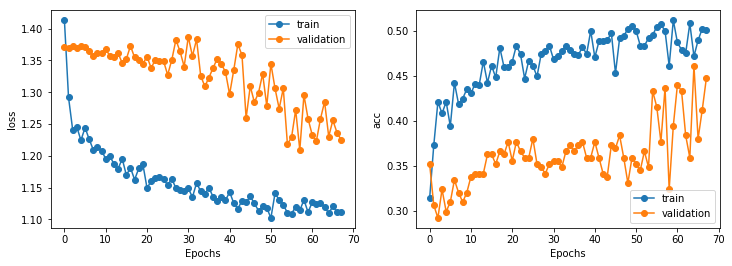

In [251]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

In [252]:
model.predict(test_X)

array([[0.19930363, 0.32940486, 0.2839709 , 0.18732075],
       [0.38354737, 0.04430178, 0.37921453, 0.1929364 ],
       [0.29945868, 0.27868602, 0.26854336, 0.15331197],
       ...,
       [0.40836024, 0.43825608, 0.12372348, 0.02966018],
       [0.22809727, 0.22844665, 0.26630244, 0.27715364],
       [0.29080087, 0.11613531, 0.2134611 , 0.37960276]], dtype=float32)

In [253]:
model.predict(train_X)

array([[0.01585164, 0.25517923, 0.2367742 , 0.49219492],
       [0.06536304, 0.7256118 , 0.1671149 , 0.04191028],
       [0.05075301, 0.7818642 , 0.14517409, 0.02220874],
       ...,
       [0.06209362, 0.793361  , 0.12216439, 0.02238107],
       [0.2603832 , 0.15128098, 0.25010502, 0.3382308 ],
       [0.12010518, 0.55413204, 0.26238957, 0.06337316]], dtype=float32)